In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [230]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [231]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Text(0.5, 1.0, 'Median House Value Distribution')

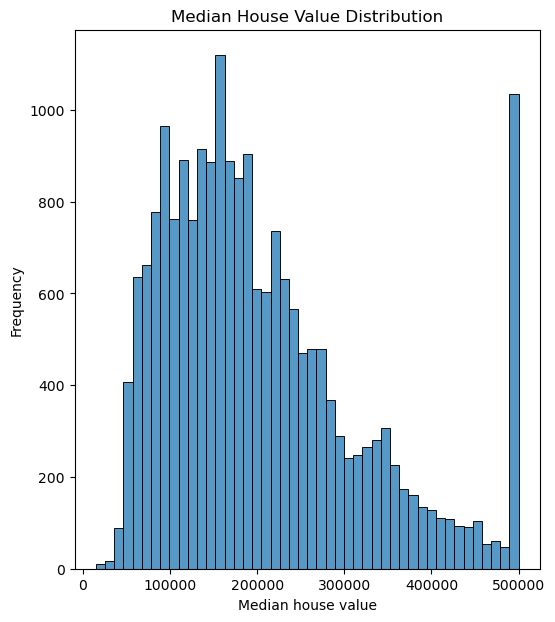

In [232]:
# check for a long tail on "median_house_value"
plt.figure(figsize=(6, 7))

sns.histplot(df.median_house_value)
plt.xlabel("Median house value")
plt.ylabel('Frequency')
plt.title("Median House Value Distribution")

In [233]:
# First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
df_new = df.loc[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]

In [234]:
df_new.drop(['ocean_proximity'], axis = 1, inplace=True)
df_new.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_43000\1549277445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(['ocean_proximity'], axis = 1, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


### # Question 1:
There's one feautre with missing values. What is it?

In [235]:
df_new.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Total_Bedrooms contains missing values.

### Question 2:
Whats the median (50% percentile) for variable 'population'?

In [236]:
# What's the median (50% percentile) for variable 'population'?
df_new.population.describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

## Prepare and Split the Dataset:
- shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [237]:
np.random.seed(42)

idx = np.arange(n)
np.random.shuffle(idx)

n = len(df_new)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

df_shuffled = df_new.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [238]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [239]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [240]:
# Applying log transformation
df_train.median_house_value = np.log1p(df_train.median_house_value.values)
df_val.median_house_value = np.log1p(df_val.median_house_value.values)
df_test.median_house_value = np.log1p(df_test.median_house_value.values)
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,11.161963
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,12.321635
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,12.471896
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,12.359227
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,12.574531


In [241]:
# Reset Index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,11.161963
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,12.321635
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,12.471896
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,12.359227
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,12.574531


### Question 3:
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

#### Filling NA with the Mean value

In [242]:
mean_tot_beds = df_train['total_bedrooms'].mean()
mean_tot_beds

542.552956325786

In [243]:
# df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(mean_tot_beds)

#### Defining targets (y)

In [244]:
# Defining targets in preparation for training
# y_train_orig = df_train.median_house_value.values
# y_val_orig = df_val.median_house_value.values
# y_test_orig = df_test.median_house_value.values

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

# Delete after reassigning
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

y_train

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

In [245]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306


In [246]:
df_train.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
dtype: int64

#### Prepare X matrix
I'll be making use of 2 functions here:
- prepare_X_zero: will fill missing values with 0
- prepare_X_mean: will fill the missing values with the mean_tot_beds value

In [247]:
base = list(df_train.columns)
base

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [248]:
def prepare_X_zero(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [249]:
def prepare_X_mean(df):
    df_num = df[base]
    mean_value = df_train['total_bedrooms'].mean()
    df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(mean_value)
    X = df_num.values
    return X

In [250]:
df_train[base]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
9408,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080
9409,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
9410,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546
9411,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526


In [251]:
# Define linear regression function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [252]:
X_train = prepare_X_mean(df_train)
X_train

array([[-1.1914e+02,  3.6230e+01,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [-1.1779e+02,  3.4120e+01,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [-1.1797e+02,  3.3680e+01,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [-1.1808e+02,  3.4130e+01,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [-1.1846e+02,  3.4290e+01,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [-1.1841e+02,  3.4000e+01,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [253]:
w_0, w = train_linear_regression(X_train, y_train)
w_0, w

(-9.88613321476845,
 array([-2.57026361e-01, -2.68652914e-01,  1.79880767e-03, -3.87631029e-05,
         3.78806885e-04, -1.49641599e-04,  3.25344392e-04,  1.81951358e-01]))

In [254]:
X_val = prepare_X_mean(df_val)
X_val

array([[-120.09  ,   37.02  ,    9.    , ..., 1057.    ,  295.    ,
           3.7143],
       [-117.88  ,   33.84  ,   34.    , ...,  837.    ,  240.    ,
           6.1168],
       [-118.21  ,   33.95  ,   32.    , ..., 1265.    ,  302.    ,
           2.295 ],
       ...,
       [-118.04  ,   34.    ,   30.    , ..., 2114.    ,  838.    ,
           5.1985],
       [-118.15  ,   34.1   ,   36.    , ..., 2277.    ,  828.    ,
           3.1211],
       [-117.71  ,   34.09  ,   36.    , ..., 1385.    ,  483.    ,
           4.1739]])

In [255]:
y_pred = w_0 + X_val.dot(w)
y_pred

array([11.71462282, 12.47428049, 11.84127314, ..., 12.39294053,
       12.05541417, 12.06224727])

#### Root mean square error

In [256]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [257]:
rmse(y_val, y_pred)

0.3405699801532541

### Let's calculate the missing value with zero and compare 

In [258]:
X_train = prepare_X_zero(df_train)
X_train

array([[-1.1914e+02,  3.6230e+01,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [-1.1779e+02,  3.4120e+01,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [-1.1797e+02,  3.3680e+01,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [-1.1808e+02,  3.4130e+01,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [-1.1846e+02,  3.4290e+01,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [-1.1841e+02,  3.4000e+01,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [259]:
w_0, w = train_linear_regression(X_train, y_train)
w_0, w

(-9.76324947663354,
 array([-2.55938802e-01, -2.68233309e-01,  1.77710730e-03, -3.38393956e-05,
         2.93766352e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01]))

In [260]:
X_val = prepare_X_zero(df_val)
X_val

array([[-120.09  ,   37.02  ,    9.    , ..., 1057.    ,  295.    ,
           3.7143],
       [-117.88  ,   33.84  ,   34.    , ...,  837.    ,  240.    ,
           6.1168],
       [-118.21  ,   33.95  ,   32.    , ..., 1265.    ,  302.    ,
           2.295 ],
       ...,
       [-118.04  ,   34.    ,   30.    , ..., 2114.    ,  838.    ,
           5.1985],
       [-118.15  ,   34.1   ,   36.    , ..., 2277.    ,  828.    ,
           3.1211],
       [-117.71  ,   34.09  ,   36.    , ..., 1385.    ,  483.    ,
           4.1739]])

In [261]:
y_pred = w_0 + X_val.dot(w)
y_pred

array([11.71830182, 12.47794996, 11.84203817, ..., 12.40213723,
       12.06030557, 12.06854096])

In [262]:
rmse(y_val, y_pred)

0.34084790341672694

#### Although they are both quite close, making use of the mean value gives a better RMSE! Both are equally good.

## Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [263]:
X_train = prepare_X_zero(df_train)

In [264]:
# Regularized LR
# r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

# for i in r:
def train_linear_regression_reg(X, y, r):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        XTX = XTX + r *np.eye(XTX.shape[0])
        
        XTX_inv = np.linalg.inv(XTX)
        w = XTX_inv.dot(X.T).dot(y)

        return w[0], w[1:]

In [265]:
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)
w_0, w

(-9.76324947663354,
 array([-2.55938802e-01, -2.68233309e-01,  1.77710730e-03, -3.38393956e-05,
         2.93766352e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01]))

In [266]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for i in r:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=i)
    print("Regularization value:", i)
    print(w_0, w)
    y_pred = w_0 + X_val.dot(w)
    print("RMSE = ", rmse(y_val, y_pred).round(2))
    print("")

Regularization value: 0
-9.76324947663354 [-2.55938802e-01 -2.68233309e-01  1.77710730e-03 -3.38393956e-05
  2.93766352e-04 -1.52190447e-04  3.96908643e-04  1.80600946e-01]
RMSE =  0.34

Regularization value: 1e-06
-9.763228829938916 [-2.55938574e-01 -2.68233130e-01  1.77710920e-03 -3.38394344e-05
  2.93766187e-04 -1.52190443e-04  3.96909047e-04  1.80600973e-01]
RMSE =  0.34

Regularization value: 0.0001
-9.761185234381275 [-2.55916002e-01 -2.68215347e-01  1.77729760e-03 -3.38432775e-05
  2.93749821e-04 -1.52190058e-04  3.96948960e-04  1.80603655e-01]
RMSE =  0.34

Regularization value: 0.001
-9.742646248231651 [-2.55711238e-01 -2.68054028e-01  1.77900669e-03 -3.38781406e-05
  2.93601353e-04 -1.52186566e-04  3.97311044e-04  1.80627981e-01]
RMSE =  0.34

Regularization value: 0.01
-9.56105619205405 [-2.53705567e-01 -2.66473898e-01  1.79574734e-03 -3.42196251e-05
  2.92147094e-04 -1.52152368e-04  4.00857666e-04  1.80866259e-01]
RMSE =  0.34

Regularization value: 0.1
-8.0588897688745 [-2

#### R = 0 Gives the best RMSE before rounding up, after rounding up there ist much visible difference between 0, 1e-06, 0.0001, 0.001, 0.01 and 0.1.

## Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [267]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Declare emtpy list for rmse values
error_values = []

In [268]:
for i in seeds:
    np.random.seed(i)

    n = len(df_new)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df_new.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    # Reset Index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # Defining targets in preparation for training
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    # Delete after reassigning
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']    
    
    X_train = prepare_X_zero(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)
    print("RMSE with seed: {0} = {1}".format(i, rmse(y_val, y_pred)))
    error_values.append(rmse(y_val, y_pred))

RMSE with seed: 0 = 0.7264775257132519
RMSE with seed: 1 = 0.7240866537205365
RMSE with seed: 2 = 0.7422608402230292
RMSE with seed: 3 = 0.7249588744735582
RMSE with seed: 4 = 0.740539571403079
RMSE with seed: 5 = 0.7357125984548611
RMSE with seed: 6 = 0.735602243491852
RMSE with seed: 7 = 0.7352074502155753
RMSE with seed: 8 = 0.7350906740779459
RMSE with seed: 9 = 0.7391604683093748


In [269]:
err = np.array(error_values)
err

array([0.72647753, 0.72408665, 0.74226084, 0.72495887, 0.74053957,
       0.7357126 , 0.73560224, 0.73520745, 0.73509067, 0.73916047])

In [270]:
err = np.std(err).round(3)
err

0.006

## Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [275]:
    np.random.seed(9)

    n = len(df_new)

#   Splitting the dataset
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df_new.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    # Reset Index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
#   Combine datasets
    frames = [df_train, df_val]
    df_train_val = pd.concat(frames)
    
# Defining targets in preparation for training
    y_train = np.log1p(df_train_val.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    # Delete after reassigning
    del df_train_val['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_test = prepare_X_zero(df_test)

    X_train = prepare_X_zero(df_train_val)
    w_0, w = train_linear_regression_reg(X_train, y_train, 0.001)
    y_pred = w_0 + X_test.dot(w)
    print(rmse(y_test, y_pred))

0.3349899336609546
